# Pymaceuticals Inc.
---

### Analysis

- Mice treated with Capomulin and Ramicane have the lowest mean tumor volume, which may suggest that it is more effective than the other drug regimens. However, it is also worth noting that more mice were treated with these two drugs than the other drugs regimens, as seen on the bar charts.

- Tumor volume with a drug regimen of Capomulin does go down over time, but has some sharp spikes, particularly at the end, which may suggest a need for continued treatment.

- As the scatterplot Tumor Volume vs Mouse Weight for Mice Treated with Capomulin indicates, Capomulin may not be as effective for larger mice than for smaller mice.
 

In [1]:
# Dependencies and Setup
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata = mouse_metadata.join(study_results.set_index('Mouse ID'), on='Mouse ID').reset_index(drop=True)

# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_metadata.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)
dup_ids = mouse_metadata.loc[dup_mice, 'Mouse ID'].unique()
dup_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_metadata[dup_mice == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_metadata = mouse_metadata[~mouse_metadata['Mouse ID'].isin(dup_ids)]
clean_mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_metadata['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_drugs = clean_mouse_metadata.groupby('Drug Regimen')['Tumor Volume (mm3)']
desc_stats = df_drugs.describe().drop(columns = ['count', '25%', '75%', 'min', 'max'])
desc_stats = desc_stats.rename(columns={'mean': 'Mean Tumor Volume',
                                       'std': 'Tumor Volume Std. Dev.',
                                        '50%': 'Median Tumor Volume',
                                       })
desc_stats['Tumor Volume Variance'] = df_drugs.var()
desc_stats['Tumor Volume Std. Err.'] = df_drugs.sem()

desc_stats = desc_stats.reindex(columns=['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.'])
desc_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

clean_mouse_metadata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

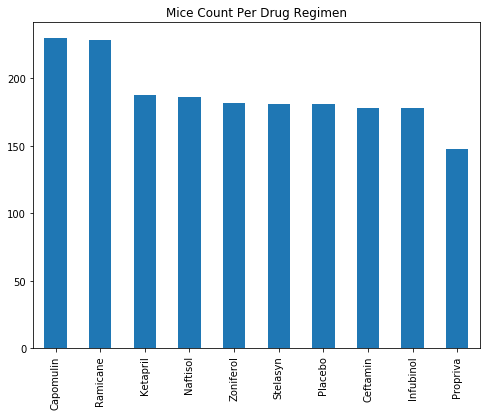

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_mice = clean_mouse_metadata['Drug Regimen'].value_counts()
drug_mice.plot(kind = 'bar', figsize = (8,6), title = "Mice Count Per Drug Regimen") 

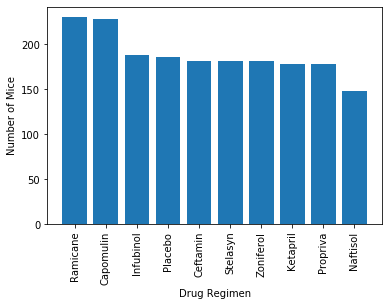

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_mouse_metadata['Drug Regimen'].unique()
y_axis = clean_mouse_metadata['Drug Regimen'].value_counts()
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

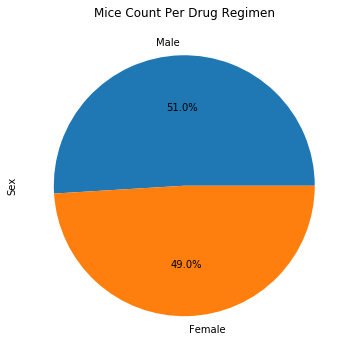

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_mice = clean_mouse_metadata['Sex'].value_counts()
drug_mice.plot(kind = 'pie', figsize = (8,6), title = "Mice Count Per Drug Regimen", autopct = "%1.1f%%") 


([<matplotlib.patches.Wedge at 0x7fb568730810>,
 [Text(-0.7433500820741924, -0.942035379102235, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, ' Female')],
 [Text(-0.4336208812099456, -0.549520637809637, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

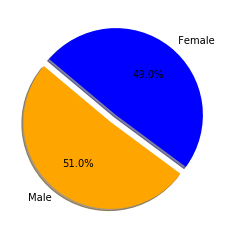

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", " Female"]

# The values of each section of the pie chart
sizes = clean_mouse_metadata["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0,)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = clean_mouse_metadata.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = pd.DataFrame(max_timepoint)
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_mouse_data = max_timepoint.merge(clean_mouse_metadata, how='left')
max_mouse_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    new_mouse_data = max_mouse_data.loc[max_mouse_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
     #add subset 
    empty_list.append(new_mouse_data)
    
    
     # Determine outliers using upper and lower bounds
    quartiles = new_mouse_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

    outliers = new_mouse_data.loc[(new_mouse_data < lower_bound ) | (new_mouse_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 

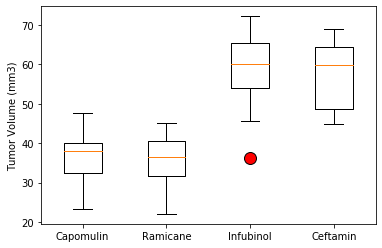

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red', markersize=12)
plt.boxplot(empty_list, labels = treatment_list, flierprops=red_out)
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

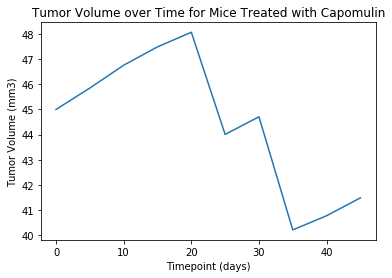

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_mouse_metadata.loc[clean_mouse_metadata["Drug Regimen"]=="Capomulin"]
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"]=="l509"]

# Plot the tumor volume over time
timepoints = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]
plt.plot(timepoints, tumor_volumes)

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mice Treated with Capomulin')

# Show the plot
plt.show()

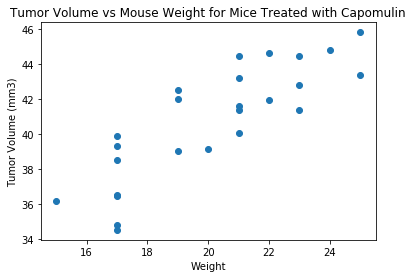

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = clean_mouse_metadata.loc[clean_mouse_metadata["Drug Regimen"]=="Capomulin"]
mouse_average = capomulin_data.groupby(["Mouse ID"]).mean()

# Plot the tumor volume over time
weight = mouse_average["Weight (g)"]
tumor_volumes = mouse_average["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_volumes)

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Mouse Weight for Mice Treated with Capomulin')

# Show the plot
plt.show()



## Correlation and Regression

The r-squared is: 0.7088568047708721


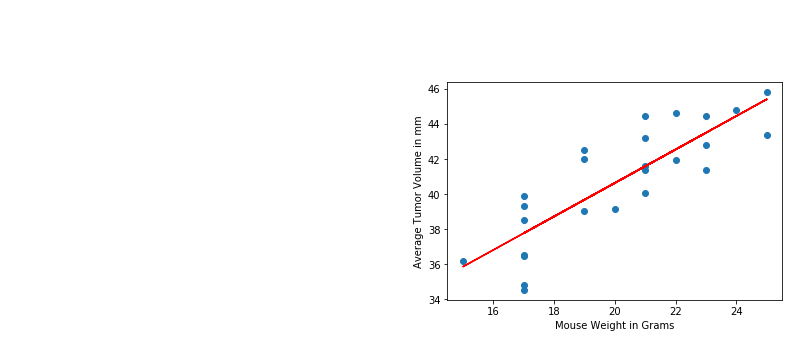

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = weight
y_values = tumor_volumes
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Average Tumor Volume in mm')
print(f"The r-squared is: {rvalue**2}")
plt.show()

